
## Clustering Using Affinity Propagation 

### Deema Albadan
### UT EID: dja2669

### PGE 383: Subsurface Machine Learning, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin



### Executive Summary

This workflow demonstrates the application of Scikit Learn Affinity Propagation, which is an unsupervised machine learning  clustering algorithm. The algorithm utilizes the negative squared Euclidean distance as a similarity measure. It identifies exemplars in a dataset, which are data points that serve as representatives for each cluster. One of the neat aspects about affinity propagation is that it does not require the number of clusters to be specified beforehand. However, the output is very sensitive to the selected preference parameter and damping factor. Overall, Affinity propagation is a powerful clustering technique, yet experimentation and understanding the behavior of the algorithm with the subject data are key to successful application.



This workflow provides a hands-on example of applying **Affinity Propagation** for clustering and offers a starting point for exploring the algorithm's behavior and its application to specific datasets.

**Unsupervised Machine Learning** <br>
unsupervised machine learning refers to the algorithms used to analyze, cluster, and learn patterns from unlabled datasets. 

**Affinity Propagation** <br>
Affinity propagation was first introduced in 2007 by Brendan J. Frey and Delbert Dueck. The idea behind this algorithm is clustering data based on a measure of similarity. 

Affinity Propagation is similar in principle to k-means clustering. Data centers are created iteratively by minimizing the sum of squared errors between data points and their nearest centers. Data points that are selected as centers are referred to as *exemplars*. The main difference is that affinity propagation uses the existing data points, while k-centers uses arbitrary centroids computed based on the mean of the clusters.

Affinity propagation process can be summarized in the following steps:
1. Similarity Matrix: Calculate a similarity matrix based on pairwise negative squared Euclidean distances between data points.

2. Preference Matrix: Set a preference value for each data point, controlling the likelihood of becoming an exemplar.

3. Responsibility Matrix (R): Initialize and iteratively update a matrix representing the responsibility of one data point to be an exemplar for another. This is done by considering the maximum "net similarity" between a point and all other points.

4. Availability Matrix (A): Initialize and iteratively update a matrix representing the availability of one data point to choose another as its exemplar. This is influenced by the positive "net responsibility" between a point and all other points.

5. Exemplars and Clusters: Identify exemplars by combining the responsibility and availability matrices. Clusters are formed around these exemplars.

6. Convergence Check: Repeat the process until convergence, where no further changes in exemplars occur.



One of the important features of affinity propagation is that it does not require a number of clusters to be sepecified. Instead it uses "preferences", which are user inputs describing the likelihood of a data point to be chosen as an exemplar. 





#### Import Packages 
we will use sklearn.cluster.AffinityPropagation for this workflow.

In [1]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import pandas as pd                
import matplotlib.pyplot as plt
import seaborn as sns                         


#### Load Data
The comments in this workflow demonstrate a simple dataset (idata = 1), which is a good example for data clustering. The workflow was also tested on a more complex and less trivial dataset (idata = 2). You can change the dataset to explore the sensitivity of affinity propagation on the structure of dataset used. 


In [2]:
idata = 1        #Select dataset

if idata == 1:
# Load a sample dataset
    df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_Gaussian_mixture_v1.csv")

else:
# Load a sample dataset
    df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv')


#### Inspect data

In [3]:
df.head()

,Unnamed: 0,Por,AI,Facies
0,0,17.380049,2942.043321,0
1,1,17.473773,2862.323981,0
2,2,16.874080,2843.042816,0
3,3,17.117432,2880.817908,0
4,4,16.591956,2864.390218,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,477.0,36.610063,24.204463,0.000000,17.000000,34.000000,54.000000,96.000000
Por,477.0,14.479310,2.965744,8.938189,11.749169,16.081174,16.924816,19.135287
AI,477.0,4494.903124,1357.239351,2590.765673,2901.083181,4681.938249,5412.224236,6907.353438
Facies,477.0,2.932914,2.186597,0.000000,1.000000,3.000000,5.000000,6.000000


#### Normalize Data

Since Porosity and Acoustic Impedence greatly differ in scale, we normalize the dataset between 0 and 1. Our measure of similarity in this workflow is Euclidean distance, which is sensitive to the scale of the variables. If the variables have different units or scales, the larger-scaled variables may dominate the distance calculations. Normalizing the data ensures that each variable contributes more equally to the distance metric.

In [5]:
#Normalization from Professor Michael Pyrcz, 
#https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_clustering.ipynb

if idata == 1:
    pormin = df['Por'].min(); pormax = df['Por'].max()
    AImin = df['AI'].min(); AImax = df['AI'].max()

    df['Norm_Porosity'] = (df['Por']-pormin)/(pormax - pormin)
    df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)
else:
    pormin = df['Porosity'].min(); pormax = df['Porosity'].max()
    AImin = df['AI'].min(); AImax = df['AI'].max()

    df['Norm_Porosity'] = (df['Porosity']-pormin)/(pormax - pormin)
    df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)

#### Inspect statistics after normalization

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,477.0,36.610063,24.204463,0.000000,17.000000,34.000000,54.000000,96.000000
Por,477.0,14.479310,2.965744,8.938189,11.749169,16.081174,16.924816,19.135287
AI,477.0,4494.903124,1357.239351,2590.765673,2901.083181,4681.938249,5412.224236,6907.353438
Facies,477.0,2.932914,2.186597,0.000000,1.000000,3.000000,5.000000,6.000000
Norm_Porosity,477.0,0.543402,0.290842,0.000000,0.275665,0.700492,0.783226,1.000000
Norm_AI,477.0,0.441121,0.314424,0.000000,0.071890,0.484450,0.653632,1.000000


In [8]:
if idata == 1:
    df_subset = df.iloc[:,[4,5]]          # extract Porosity and AI for a simple 2D example                      # preview the new DataFrame
else:
    df_subset = df.iloc[:,[7,8]]          # extract Porosity and AI for a simple 2D example
    

df_subset.head()                          # preview the new DataFrame

,Norm_Porosity,Norm_AI
0,0.827869,0.081379
1,0.837060,0.062910
2,0.778250,0.058444
3,0.802115,0.067195
4,0.750583,0.063389


#### Visualize Data

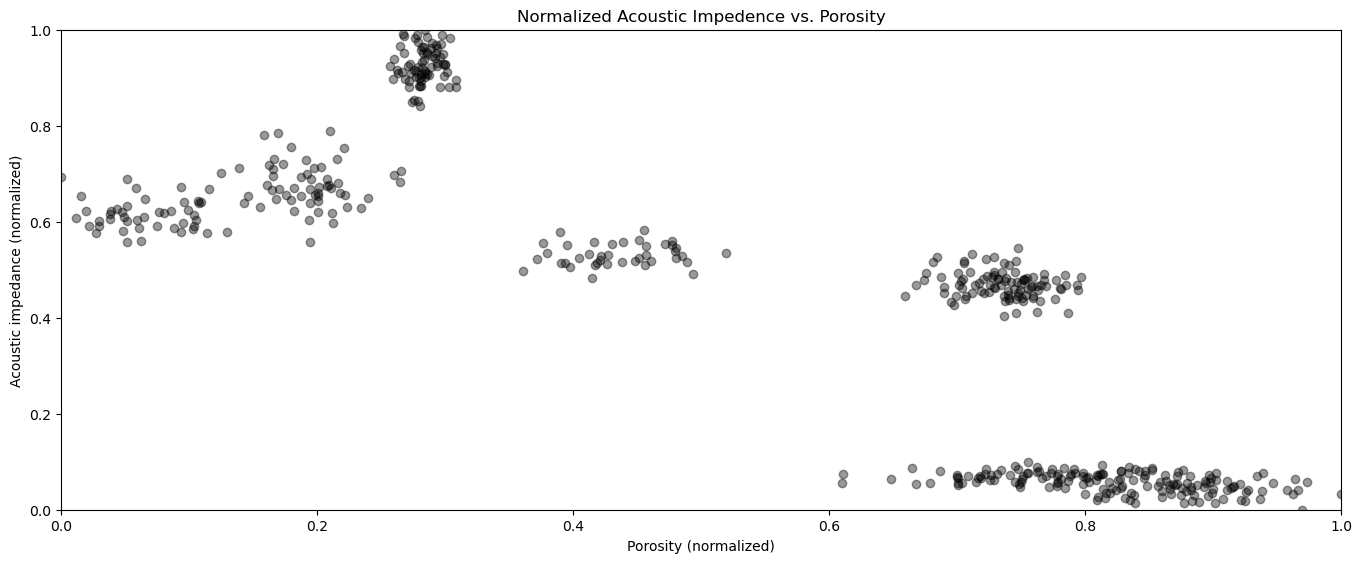

In [10]:
# scatter plot our data  

plt.scatter(df_subset['Norm_Porosity'], df_subset['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Convert data frame to 2D array

In [11]:
# Select columns to combine
selected_columns = ['Norm_Porosity', 'Norm_AI']

# Combine selected columns into a 2D array
data = df_subset[selected_columns].values


#### Perform Affinity Propagation Clustering of data
Affinity Propagation relies on a message-passing mechanism between data points to iteratively update responsibility and availability matrices until convergence. These messages can be defined as:

**Types of Messages Exchanged**
1. Responsibility *r(i,k)*: how well-suited point *k* is to serve as the exemplar for point *i*.

$$r(i,k) ← s(i,k) - max[a(i,k') + s(i,k')∀k'≠k]$$

2. Availability *a(i,k)*: how appropriate it would be for point *i* to choose point *k* as its exemplar. 

$$a(i,k) ← min[0,r(k,k)+\sum \limits _{i' s.t. i'∉{i,k}}r(i',k)]$$

The algorithm incorporates a damping factor to avoid numerical oscillations.

In [15]:
# Instantiate the model
af = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15, 
                         copy=True, preference=None, affinity='euclidean', 
                         verbose=False, random_state=50)

# Fit the model to the data
af.fit(data)

# Get cluster labels and cluster centers
cluster_labels = af.labels_
cluster_centers = data[af.cluster_centers_indices_]

n_clusters_ = len(cluster_centers)

# Print the number of clusters
print("Estimated number of clusters: %d" % n_clusters_)

# Print the cluster centers
print("Cluster centers:")
print(cluster_centers)

Estimated number of clusters: 7
Cluster centers:
[[0.75122162 0.07037811]
 [0.88224892 0.04646774]
 [0.20088966 0.67336757]
 [0.06423835 0.60913419]
 [0.27874899 0.92260167]
 [0.42711775 0.5316552 ]
 [0.73378539 0.46756869]]


#### Visulaize the resulting clusters and selected exemplars

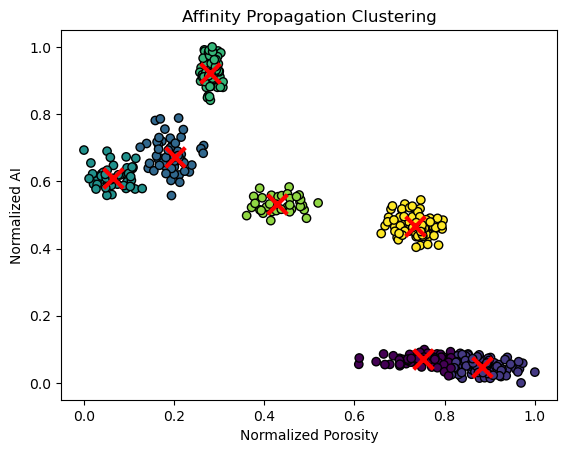

In [16]:
# Plot the data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')

# Set labels and title
plt.xlabel('Normalized Porosity')
plt.ylabel('Normalized AI')
plt.title('Affinity Propagation Clustering')

# Show the plot
plt.show()

The color of each point in the above plot corresponds to its assigned cluster label. Additionally, cluster centers are marked with red 'x' markers.

The number of clusters in affinity propagation is  determined based on the provided data. Although the user cannot specify an exact number of clusters, there are two important parameters that can influence the number of clusters: 
1. *Preference*: the likelihood of a data point to be an exemplar. Higher preference values generally result in fewer exemplars, and vice versa. The default input is the median of the calculated similarities. 
<br>

2. *Damping factor, λ*: a value between 0.5 and 1.0, It helps prevent the responsibility and availability matrices from oscillating excessively between iterations, which can happen when the algorithm is trying to converge. It's often a matter of experimentation to find the optimal damping factor for a specific application. 

We can get a summary of the parameters used by running the below line:

In [17]:
af.get_params(deep=True)

{'affinity': 'euclidean',
 'convergence_iter': 15,
 'copy': True,
 'damping': 0.9,
 'max_iter': 200,
 'preference': None,
 'random_state': 50,
 'verbose': False}

We can also extract the affinity matrix, which is calculated based on the negative squared euclidean distance between points

In [18]:
# Get the affinity matrix
affinity_matrix = af.affinity_matrix_
print(affinity_matrix)

[[-0.21102016 -0.00042555 -0.00298805 ... -0.18509468 -0.14283214
  -0.1550922 ]
 [-0.00042555 -0.21102016 -0.00347858 ... -0.20297101 -0.15837873
  -0.17141441]
 [-0.00298805 -0.00347858 -0.21102016 ... -0.19534878 -0.1547458
  -0.16576801]
 ...
 [-0.18509468 -0.20297101 -0.19534878 ... -0.21102016 -0.00337248
  -0.00142662]
 [-0.14283214 -0.15837873 -0.1547458  ... -0.00337248 -0.21102016
  -0.00046974]
 [-0.1550922  -0.17141441 -0.16576801 ... -0.00142662 -0.00046974
  -0.21102016]]


Let's look at the median, max, and min of the calculated affinity matrix

In [19]:
#Calculate the median of the affinity matrix
median_affinity = np.median(affinity_matrix)
max_affinity = np.max(affinity_matrix)
min_affinity = np.min(affinity_matrix)
# Print or use the median affinity as needed
print("Median Affinity:", median_affinity)
print("Max Affinity:", max_affinity)
print("Min Affinity:", min_affinity)

Median Affinity: -0.21102015797422616
Max Affinity: -7.591574968657254e-08
Min Affinity: -1.476052206501184


As we can see the median value was used to populate the diagonal of the affinity matrix.

**Note:** the code might take some time to run depending on the number of preference values set.<br>
We can disable warnings for a cleaner look by running the below line

In [20]:
import warnings
warnings.filterwarnings("ignore")

Now let's iterate over different preference values and explore the number of clusters created. Let's start with a range between the minimum and maximum affinity.

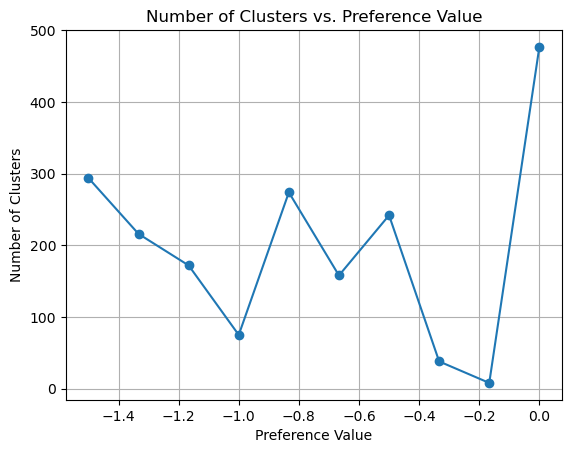

In [21]:
preference_values = np.linspace(-1.5, 0, 10)  # Adjust the range based on data

# Lists to store results
num_clusters_list = []

# Loop over different preference values
for pref in preference_values:
    # Create and fit the AffinityPropagation model
    affinity_propagation = AffinityPropagation(preference=pref, random_state=50)
    affinity_propagation.fit(data)

    # Get the number of clusters
    num_clusters = len(np.unique(affinity_propagation.labels_))
    num_clusters_list.append(num_clusters)

# Plot the results
plt.plot(preference_values, num_clusters_list, marker='o', linestyle='-')
plt.title('Number of Clusters vs. Preference Value')
plt.xlabel('Preference Value')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()

We can see that the reasonable number of clusters is around the median. So let's narrow our range down around the median. 

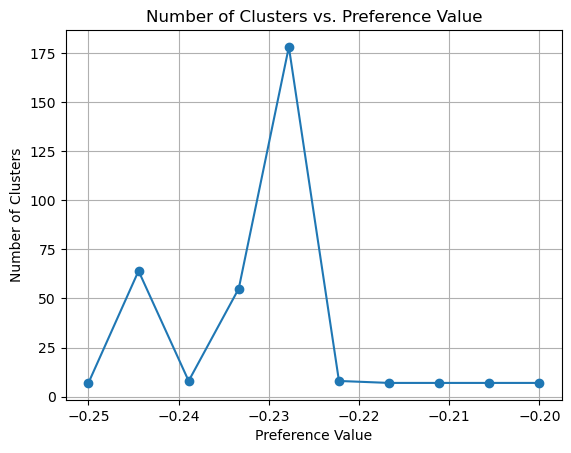

In [22]:
preference_values = np.linspace(-0.25, -0.20, 10)  # Adjust the range based on your data

# Lists to store results
num_clusters_list = []

# Loop over different preference values
for pref in preference_values:
    # Create and fit the AffinityPropagation model
    affinity_propagation = AffinityPropagation(preference=pref, random_state=50)
    affinity_propagation.fit(data)

    # Get the number of clusters
    num_clusters = len(np.unique(affinity_propagation.labels_))
    num_clusters_list.append(num_clusters)

# Plot the results
plt.plot(preference_values, num_clusters_list, marker='o', linestyle='-')
plt.title('Number of Clusters vs. Preference Value')
plt.xlabel('Preference Value')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()

Despite using a preference value close to the mean, the algorithm can still exhibit some oscillation. This indicates that we need to tune both the preference and damping factor of the model. 

Now let's iterate over a range of both preference and damping values and observe the effect on the number of clusters. We can visualize this through a heatmap showing the number of clusters for each combination of parameters.

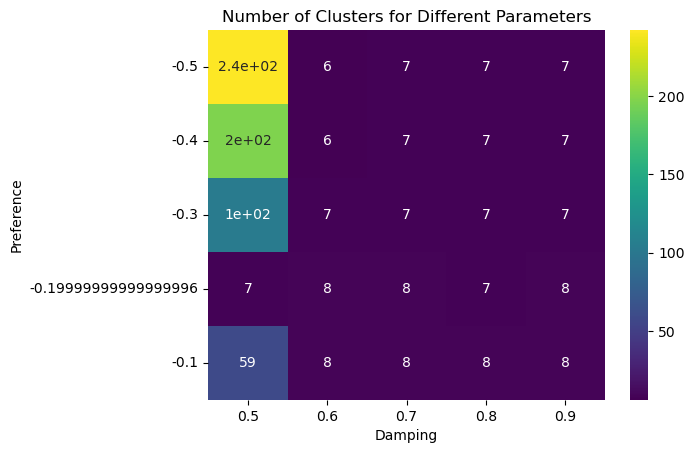

In [23]:
# Define a range of preference and damping values
preference_values = np.linspace(-0.50, -0.10, 5)

#Uncomment the below line to try a different range and observe the effect
#preference_values = np.linspace(-0.25, -0.20, 6)
#preference_values = np.linspace(-1, -0.10, 5)
#preference_values = np.linspace(-2, -1, 5)

damping_values = np.linspace(0.5, 0.9, 5)


# Lists to store results
num_clusters_grid = np.zeros((len(preference_values), len(damping_values)))

# Loop over different preference and damping values
for i, pref in enumerate(preference_values):
    for j, damping in enumerate(damping_values):
        # Create and fit the AffinityPropagation model
        affinity_propagation = AffinityPropagation(preference=pref, damping=damping, random_state=50)
        affinity_propagation.fit(data)

        # Get the number of clusters
        num_clusters = len(np.unique(affinity_propagation.labels_))
        num_clusters_grid[i, j] = num_clusters

# Plot a heatmap of the number of clusters
sns.heatmap(num_clusters_grid, annot=True, cmap='viridis', xticklabels=damping_values, yticklabels=preference_values)
plt.title('Number of Clusters for Different Parameters')
plt.xlabel('Damping')
plt.ylabel('Preference')
plt.show()


Trying different combinations of preference and damping can give us some control over the number of clusters created by affinity propagation.

We can also look at the influence of preference and damping values individually.

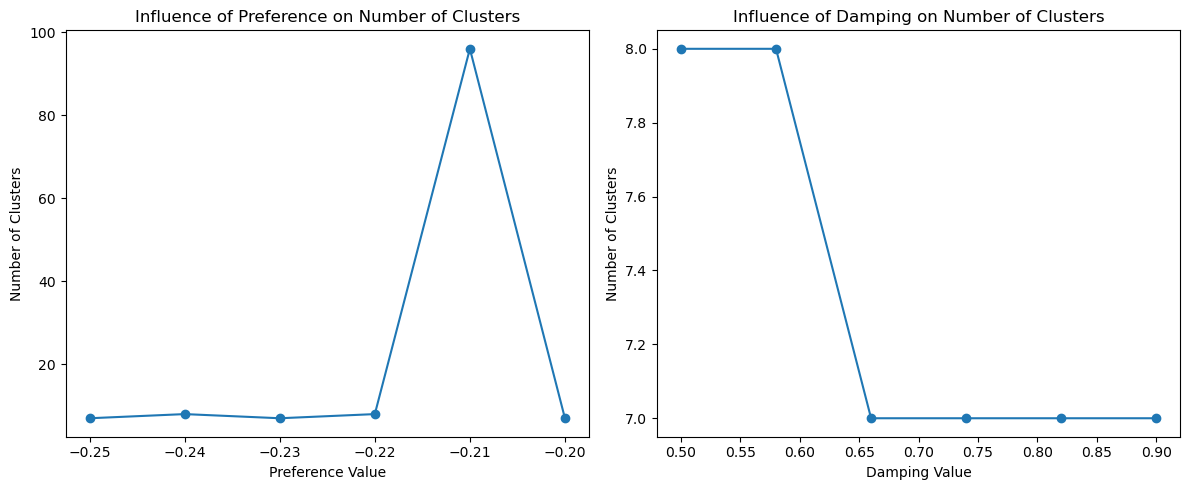

In [24]:
# Define a range of preference and damping values

if idata == 1:
    preference_values = np.linspace(-0.25, -0.20, 6)
else:
    preference_values = np.linspace(-2, -1, 5)
    
    
damping_values = np.linspace(0.5, 0.9, 6)

# Lists to store results
num_clusters_pref = []
num_clusters_damping = []

# Explore the influence of preference values
for pref in preference_values:
    affinity_propagation = AffinityPropagation(preference=pref, random_state=50)
    affinity_propagation.fit(data)
    num_clusters_pref.append(len(np.unique(affinity_propagation.labels_)))

# Explore the influence of damping values
for damping in damping_values:
    affinity_propagation = AffinityPropagation(damping=damping, random_state=50)
    affinity_propagation.fit(data)
    num_clusters_damping.append(len(np.unique(affinity_propagation.labels_)))

# Plot the influence of preference values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(preference_values, num_clusters_pref, marker='o')
plt.title('Influence of Preference on Number of Clusters')
plt.xlabel('Preference Value')
plt.ylabel('Number of Clusters')

# Plot the influence of damping values
plt.subplot(1, 2, 2)
plt.plot(damping_values, num_clusters_damping, marker='o')
plt.title('Influence of Damping on Number of Clusters')
plt.xlabel('Damping Value')
plt.ylabel('Number of Clusters')

plt.tight_layout()
plt.show()


While exploring the influence of preference values, the defualt damping value of 0.5 is used. On the other hand, the default preference of median is used when exploring the influence of damping values. 

Based on the previous results, we expect to get a number of clusters around 7 or 8 when using a preference value around the median. However, we can get incorrect number of clusters if the damping factor is set too low, causing the algorithm to oscillate and not converge properly.

In conclusion, Affinity Propagation is a unique clustering technique with its own set of advantages and limitations. Some of the notable advantages include automatic determination of clusters, no assumption of equal cluster sizes, robustness to noisy data with the help of the damping parameter. On the other hand, some of the limitations include computational complexity and memory requirements, sensitivity to parameters, potential for overfitting where the algorithm might consider outliers or noise as separate clusters. With this in mind, it's important to understand the characteristics of your data and experiment with parameter tuning to achieve optimal results.

I hope this was helpful,<br>
Deema Albadan

#### References

* Bhalerao, Akshay. (2023, Apr 30). AFFINITY PROPAGATION ALGORITHM | UNSUPERVISED CLUSTERING [video]. YouTube. https://www.youtube.com/watch?v=eaWQcXgiOVA
* Brendan J. Frey, Delbert Dueck ,Clustering by Passing Messages Between Data Points.Science315,972-976(2007).DOI:10.1126/science.1136800
* Yenigün, O. (2023, August 28). The Mechanics of Affinity Propagation Clustering. Retrieved from Medium: https://python.plainenglish.io/the-mechanics-of-affinity-propagation-clustering-eb199cc7a7c2



___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
